In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip3 install matplotlib
!pip3 install graphviz
!pip install xgboost
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok



[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load the required libraries and Dataset

In [2]:
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle


import pandas as pd
#Load the data
df = pd.read_csv('bankfull.txt',sep=";")


#View the data
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,decision
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

# Data Preprocessing
As our dataset has 10 categorical features we will need to encode these features into a numerical representation

In [4]:
##From the EDA Report we know that the dataset contain 12 duplicate records. 
##Below we will drop those records for better efficiency
data_dup = df[df.duplicated(keep = "last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,decision
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [5]:
##Dealing with Duplicate Values:
data = df.drop_duplicates()
data.shape

(41176, 21)

In [6]:
##Separating Independent and Class variables:
data_x = data.iloc[:, :-1]
print("Shape of X:",data_x.shape)
data_y = data["decision"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


In [7]:
##Splitting the data
## We will apply 64% , 16% , 20% for train, CV and test datasets rspectively

from sklearn.model_selection import train_test_split

x_rest, x_test, y_rest, y_test = train_test_split(data_x, data_y, test_size = 0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_rest, y_rest, test_size = 0.2)

print("X Train:", x_train.shape)
print("X CV:", x_cv.shape)
print("X Test:", x_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [8]:
##Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0,"yes":1}, inplace=True)
y_cv.replace({"no":0,"yes":1}, inplace=True)
y_test.replace({"no":0,"yes":1}, inplace=True)

# The next  big step for our data preprocessing is to encode all the categorical features so that we can apply models on the data

In [9]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, x_train, x_test, x_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(x_train[i])
    x_train = add_onehot_to_dataframe(temp_cols, x_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
        temp_cols = Vectorizer.transform(x_cv[i])
        x_cv = add_onehot_to_dataframe(temp_cols, x_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(x_test[i])
    x_test = add_onehot_to_dataframe(temp_cols, x_test, Vectorizer, i)

In [11]:
import warnings
warnings.filterwarnings("ignore")

OneHotEncoder(categorical_cols, x_train, x_test, x_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = x_train.drop(categorical_cols, axis=1)
X_cv = x_cv.drop(categorical_cols, axis=1)
X_test = x_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26352, 63)
Shape of CV:  (6588, 63)
Shape of test:  (8236, 63)


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 30127 to 23164
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26352 non-null  int64  
 1   duration                       26352 non-null  int64  
 2   campaign                       26352 non-null  int64  
 3   pdays                          26352 non-null  int64  
 4   previous                       26352 non-null  int64  
 5   emp.var.rate                   26352 non-null  float64
 6   cons.price.idx                 26352 non-null  float64
 7   cons.conf.idx                  26352 non-null  float64
 8   euribor3m                      26352 non-null  float64
 9   nr.employed                    26352 non-null  float64
 10  job_admin.                     26352 non-null  int64  
 11  job_blue-collar                26352 non-null  int64  
 12  job_entrepreneur               26352 non-n

Use "Duration" feature to see how the model performs with this feature. It will probably give very high AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.

Next remove the "Duration" feature, and apply the same model to check how the model performs.

Modelling with "Duration" Column Seeing how the model performs with the "duration" feature. It is to be noted again that the duration feature can not be included in the final model as it is highly correlated with the target variable, and to build any reasonable predictive model, we cannot include this feature.

In [19]:
from sklearn import preprocessing #for statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
# Create a KNN classifier object
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with the duration column: ", accuracy)

Accuracy with the duration column:  0.911486158329286


In [16]:
##**Removing "Duration" feature
# From Train dataset
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26352, 62)
The shape of the cv dataset:  (6588, 62)
The shape of the test dataset:  (8236, 62)


In [17]:
# Create a KNN classifier object
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with out duration column: ", accuracy)

Accuracy with out duration column:  0.893152015541525


# Crossvalidation for KNN 

AUC for k =  1 is 0.6649088595644931
AUC for k =  3 is 0.7228296968863295
AUC for k =  5 is 0.7442285261507616
AUC for k =  7 is 0.7551104265751133
AUC for k =  9 is 0.7610579677100842
AUC for k =  11 is 0.7696478136094006
AUC for k =  13 is 0.771159283539228
AUC for k =  15 is 0.7776346732191176


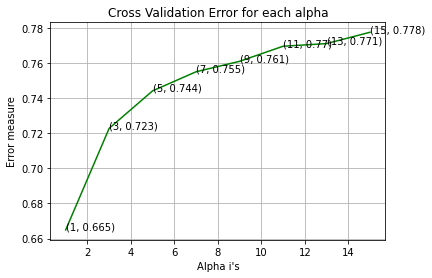

For values of best alpha =  15 The train AUC is: 0.8682362017399625
For values of best alpha =  15 The cross validation AUC is: 0.7776346732191176
For values of best alpha =  15 The test AUC is: 0.7719411837093728


In [20]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))